## Data Set Information:

Data Link: https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

This archive contains 2075259 measurements gathered between December 2006 and November 2010 (47 months).

Notes:

1.(globalactivepower*1000/60 - submetering1 - submetering2 - submetering3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2.The dataset contains some missing values in the measurements (nearly 1.25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

Attribute Information:

date: Date in format dd/mm/yyyy
time: time in format hh:mm:ss
globalactivepower: household global minute-averaged active power (in kilowatt)
globalreactivepower: household global minute-averaged reactive power (in kilowatt)
voltage: minute-averaged voltage (in volt)
global_intensity: household global minute-averaged current intensity (in ampere)
submetering1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
submetering2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
submetering3: energy sub-metering No. 3(in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

## Data Inspection

In [1]:
# import all necessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [2]:
# load the dataset 
df = pd.read_csv('household_power_consumption.txt', delimiter= ';')

C:\Users\USER\AppData\Local\Temp\ipykernel_19836\3106963437.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('household_power_consumption.txt', delimiter= ';')


In [3]:
# display the first 5 rows
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
# display the number of rows and columns
df.shape

(2075259, 9)

In [5]:
# check for null values
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [6]:
# check for duplicated rows
df.duplicated().sum()

0

In [7]:
# check for datatype of each column
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [8]:
# convert the `Date` column to datetime64 datatype 
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\USER\AppData\Local\Temp\ipykernel_19836\2301040284.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [9]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


## Data Cleaning and Preprocessing

In [10]:
# convert all the numeric columns to float datatype  
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors= 'coerce')

In [11]:
# re-check the datatype again to see if there is changes
df.dtypes

Date                     datetime64[ns]
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [12]:
# set the `Date` column as index in the dataframe
df.set_index("Date", inplace= True)

In [13]:
# display the first five rows of the dataset
df.head()

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [14]:
# check for missing values again 
df.isnull().sum()

Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [15]:
# Forward-fill missing values
df_cleaned = df.fillna(method='ffill')

# Check for missing values again
df_cleaned.isnull().sum()


Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [16]:
# Resample the data to hourly frequency and sum the values
df_hourly = df_cleaned.resample('H').sum()

C:\Users\USER\AppData\Local\Temp\ipykernel_19836\1046623969.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hourly = df_cleaned.resample('H').sum()


In [17]:
# Check the resulting DataFrame
df_hourly.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16 00:00:00,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-16 01:00:00,0.000,0.000,0.00,0.0,0.0,0.0,0.0
2006-12-16 02:00:00,0.000,0.000,0.00,0.0,0.0,0.0,0.0
2006-12-16 03:00:00,0.000,0.000,0.00,0.0,0.0,0.0,0.0
2006-12-16 04:00:00,0.000,0.000,0.00,0.0,0.0,0.0,0.0


### Q11: Which of the following is a plot of the hourly global_active_power over time?

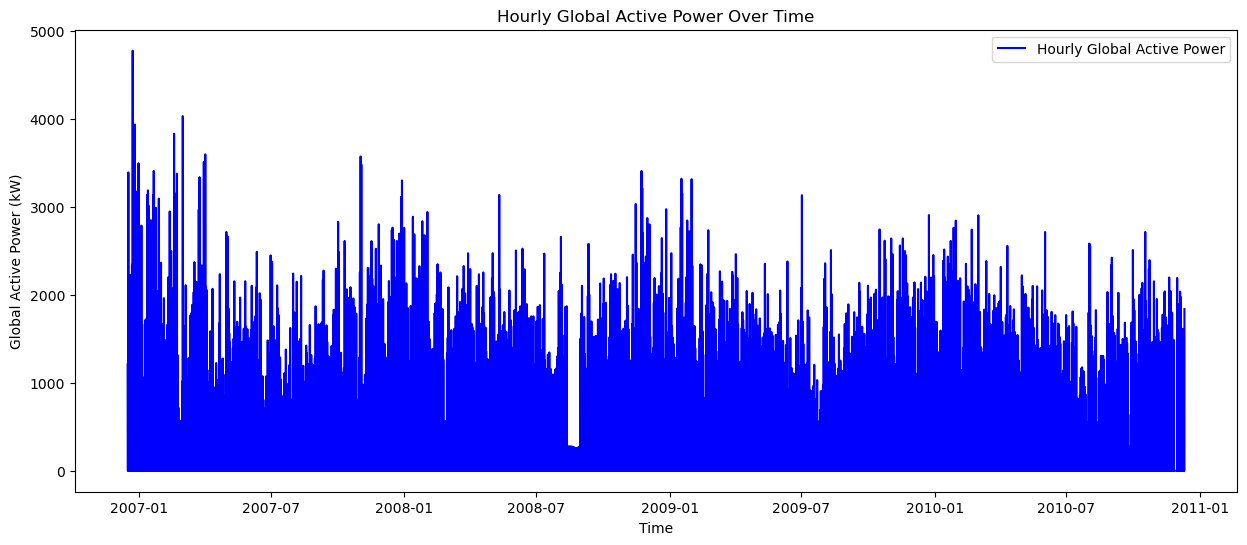

In [18]:
# Plot the hourly global_active_power
plt.figure(figsize=(15, 6))
plt.plot(df_hourly.index, df_hourly['Global_active_power'], label='Hourly Global Active Power', color='blue')
plt.title('Hourly Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

### Q12: What is the Pearson correlation coefficient between the global_active_power and voltage? To 3 decimal places

In [19]:
# to calculate Pearson correlation coefficient and print the result to 3 decimal places
correlation_coefficient = df_cleaned['Global_active_power'].corr(df_cleaned['Voltage'])
print(f"Pearson Correlation Coefficient between the global_active_power and voltage is : {correlation_coefficient:.3f}")

Pearson Correlation Coefficient between the global_active_power and voltage is : -0.396


### Q13: What is the Pearson correlation coefficient between the Voltage and global_intensity? To 2 decimal places.

In [20]:
# Calculate Pearson correlation coefficient
pcc_vol_intensity = df_cleaned['Voltage'].corr(df_cleaned['Global_intensity'])

# result to 2 decimal places
print(f"Pearson Correlation Coefficient between Voltage and Global_intensity is : {pcc_vol_intensity:.2f}")


Pearson Correlation Coefficient between Voltage and Global_intensity is : -0.41


In [27]:
# downsample the dataset on daily basis
df_daily = df_cleaned.resample("D").sum()

C:\Users\USER\AppData\Local\Temp\ipykernel_19836\2472665559.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df_cleaned.resample("D").sum()


In [28]:
# reset the dataset index
df_daily.reset_index(inplace= True)

In [29]:
# check for the number rows again after the downsampling
df_daily.shape[0]

1457

In [30]:
# split the dataset into the training and the test sets
train_ratio = df_daily.shape[0] - 300
train_set = df_daily[:train_ratio] # x-300 where x is the number of samples
test_set = df_daily[train_ratio:]  # last 300

In [31]:
# check for the training and the test sets number of rows
print(f"Training set is {train_set.shape[0]} samples")
print(f"Test set is {test_set.shape[0]} samples")

Training set is 1157 samples
Test set is 300 samples


### Model Training

In [25]:
from prophet import Prophet

In [32]:
train_set = train_set.rename(columns= {'Date' : 'ds', 'Global_active_power' : 'y'})
test_set = test_set.rename(columns= {'Date' : 'ds', 'Global_active_power' : 'y'})

model = Prophet()
model.fit(train_set[['ds', 'y']])
forecast = model.predict(test_set[['ds', 'y']])
forecast.head()

01:57:18 - cmdstanpy - INFO - Chain [1] start processing
01:57:18 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-15,1483.889444,624.770080,2096.008336,1483.889444,1483.889444,-155.113062,-155.113062,-155.113062,-105.383712,-105.383712,-105.383712,-49.729350,-49.729350,-49.729350,0.0,0.0,0.0,1328.776382
1,2010-02-16,1483.750883,680.686312,2216.272423,1483.750883,1483.750883,-80.628024,-80.628024,-80.628024,0.967419,0.967419,0.967419,-81.595443,-81.595443,-81.595443,0.0,0.0,0.0,1403.122859
2,2010-02-17,1483.612322,657.397170,2076.290036,1483.612322,1483.612322,-137.071635,-137.071635,-137.071635,-26.016080,-26.016080,-26.016080,-111.055555,-111.055555,-111.055555,0.0,0.0,0.0,1346.540687
3,2010-02-18,1483.473762,530.887180,1965.852855,1483.473762,1483.473762,-233.525445,-233.525445,-233.525445,-95.824006,-95.824006,-95.824006,-137.701439,-137.701439,-137.701439,0.0,0.0,0.0,1249.948317
4,2010-02-19,1483.335201,583.150141,2064.624055,1483.335201,1483.335201,-204.917015,-204.917015,-204.917015,-43.739193,-43.739193,-43.739193,-161.177822,-161.177822,-161.177822,0.0,0.0,0.0,1278.418186


In [33]:
# import the necessary packages
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [34]:
# RMSE
np.sqrt(mean_squared_error(test_set['y'], forecast['yhat']))

576.4803770771956

In [37]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-02-15,1328.776382,624.770080,2096.008336,1483.889444,1483.889444,1483.889444
1,2010-02-16,1403.122859,680.686312,2216.272423,1483.750883,1483.750883,1483.750883
2,2010-02-17,1346.540687,657.397170,2076.290036,1483.612322,1483.612322,1483.612322
3,2010-02-18,1249.948317,530.887180,1965.852855,1483.473762,1483.473762,1483.473762
4,2010-02-19,1278.418186,583.150141,2064.624055,1483.335201,1483.335201,1483.335201
...,...,...,...,...,...,...,...
295,2010-12-07,1745.275005,1055.034489,2496.058939,1443.014057,1442.528602,1443.483903
296,2010-12-08,1721.389214,988.969881,2442.513481,1442.875497,1442.388205,1443.347788
297,2010-12-09,1656.176303,957.618474,2371.745828,1442.736936,1442.247808,1443.211868
298,2010-12-10,1714.308248,997.629382,2429.734151,1442.598375,1442.107269,1443.075947


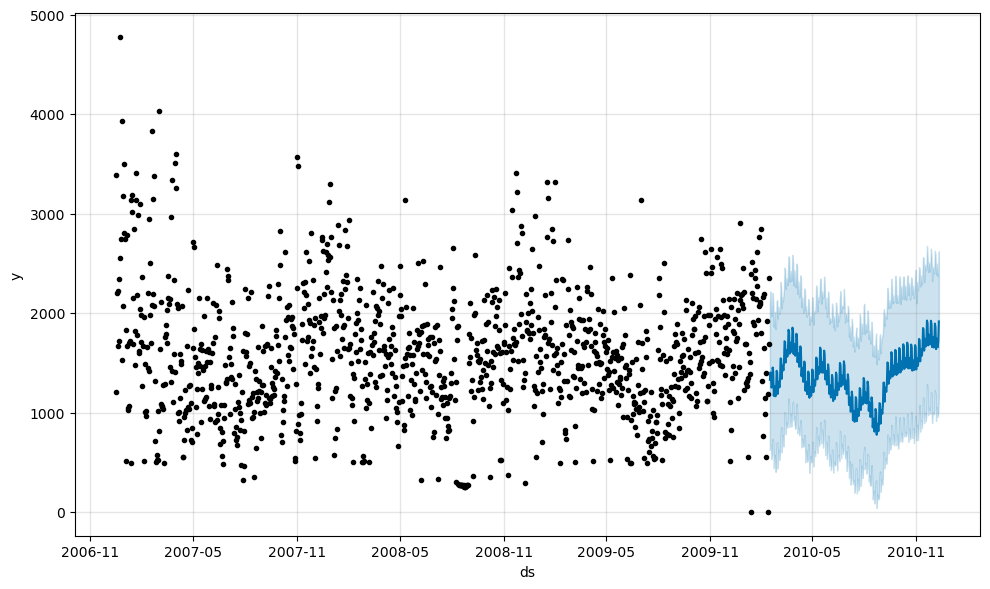

In [38]:
model.plot(forecast)
plt.show()

In [43]:
old_columns = ['Global_reactive_power', 'Voltage','Global_intensity', 'Sub_metering_1','Sub_metering_2','Sub_metering_3']
new_columns = ['add1', 'add2', 'add3', 'add4', 'add5', 'add6']

train_set = train_set.rename(columns= dict(zip(old_columns, new_columns)))
test_set = test_set.rename(columns= dict(zip(old_columns, new_columns)))

In [44]:
model = Prophet()

In [45]:
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')
model.add_regressor('add5')
model.add_regressor('add6')

In [46]:
model.fit(train_set[['ds', 'y', 'add1', 'add2', 'add3', 'add4', 'add5', 'add6']])
forecast = model.predict(test_set[['ds', 'y', 'add1', 'add2', 'add3', 'add4', 'add5', 'add6']])

02:13:50 - cmdstanpy - INFO - Chain [1] start processing
02:13:51 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-15,1597.535429,2086.482417,2127.002873,1597.535429,1597.535429,11.814316,11.814316,11.814316,0.787510,...,-0.863278,-0.863278,-0.863278,11.243454,11.243454,11.243454,0.0,0.0,0.0,2107.199446
1,2010-02-16,1597.542073,1778.960954,1819.050603,1597.542073,1597.542073,14.917724,14.917724,14.917724,0.860570,...,-1.493351,-1.493351,-1.493351,11.345567,11.345567,11.345567,0.0,0.0,0.0,1797.797339
2,2010-02-17,1597.548716,2044.651291,2084.522773,1597.548716,1597.548716,14.929963,14.929963,14.929963,0.525730,...,1.553053,1.553053,1.553053,11.402845,11.402845,11.402845,0.0,0.0,0.0,2064.764937
3,2010-02-18,1597.555359,1741.408812,1782.019843,1597.555359,1597.555359,9.491550,9.491550,9.491550,0.821166,...,0.190372,0.190372,0.190372,11.416089,11.416089,11.416089,0.0,0.0,0.0,1760.392203
4,2010-02-19,1597.562003,1949.329987,1992.422569,1597.562003,1597.562003,10.781975,10.781975,10.781975,0.373554,...,-1.354281,-1.354281,-1.354281,11.386887,11.386887,11.386887,0.0,0.0,0.0,1970.863339


In [48]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-02-15,2107.199446,2086.482417,2127.002873,1597.535429,1597.535429,1597.535429
1,2010-02-16,1797.797339,1778.960954,1819.050603,1597.542073,1597.542073,1597.542073
2,2010-02-17,2064.764937,2044.651291,2084.522773,1597.548716,1597.548716,1597.548716
3,2010-02-18,1760.392203,1741.408812,1782.019843,1597.555359,1597.555359,1597.555359
4,2010-02-19,1970.863339,1949.329987,1992.422569,1597.562003,1597.562003,1597.562003
...,...,...,...,...,...,...,...
295,2010-12-07,1133.362859,1062.580357,1204.240234,1599.495214,1532.337715,1666.126107
296,2010-12-08,553.153108,483.212079,625.492386,1599.501857,1531.910391,1666.383428
297,2010-12-09,1633.089715,1563.615424,1706.401216,1599.508501,1531.604583,1666.640748
298,2010-12-10,1618.658572,1549.922541,1688.068876,1599.515144,1531.322886,1666.898068


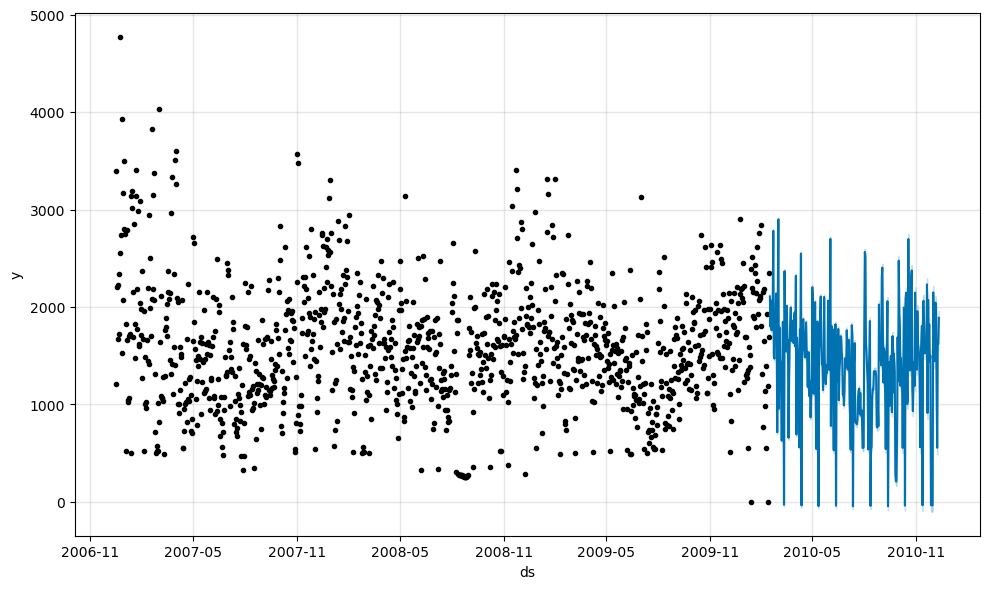

In [49]:
model.plot(forecast)
plt.show()

In [50]:
# RMSE
np.sqrt(mean_squared_error(test_set['y'], forecast['yhat']))

18.57033769519785